📊 데이터 요약 (info):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18314 entries, 0 to 18313
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   가중값          18314 non-null  float64
 1   가구원수         18314 non-null  int64  
 2   가구주_만연령      18314 non-null  int64  
 3   가구주_종사상지위코드  18314 non-null  int64  
 4   부채_금융부채      18314 non-null  int64  
 5   경상소득(보완)     18314 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 858.6 KB
None

📋 상위 5개 행:
           가중값  가구원수  가구주_만연령  가구주_종사상지위코드  부채_금융부채  경상소득(보완)
0  1000.052627     3       58            1        0     11096
1  1000.178383     2       74            4    10000      6643
2  1000.305879     4       43            1     6150      8718
3  1000.385767     3       76            4        0      5733
4  1000.419497     3       59            1        0     19745
가구원수 = 2.38,  가구주연령 = 54.9


C:\Users\hgj04\AppData\Local\Temp\ipykernel_7332\484266064.py:45: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = data.groupby('종사상지위', group_keys=False).apply(


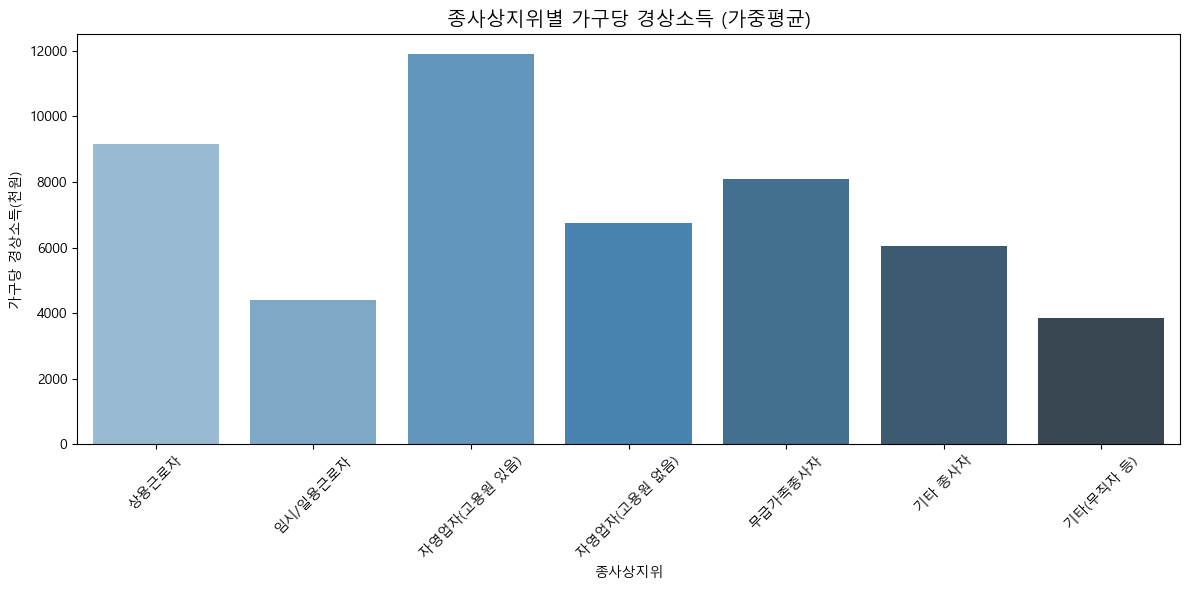

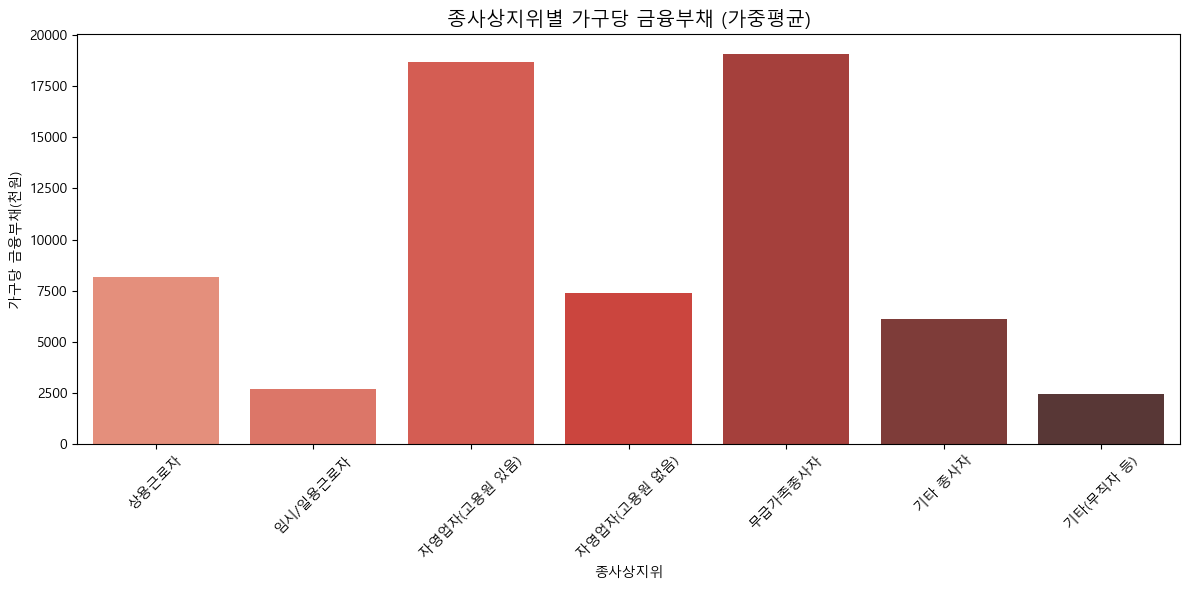

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# ✅ 한글 폰트 강제 지정 (경로 확인해서 필요시 수정!)
font_path = "C:/Windows/Fonts/malgun.ttf"  # 또는 NanumGothic.ttf
fontprop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = fontprop.get_name()
plt.rcParams['axes.unicode_minus'] = False

# CSV 파일 불러오기
file_path = "C:/Users/hgj04/Downloads/가구마스터_20250522_47879_데이터/2024_가구마스터_20250522_47879.csv"
data = pd.read_csv(file_path, encoding='cp949')

#  데이터 정보 출력
print("📊 데이터 요약 (info):")
print(data.info())
print("\n📋 상위 5개 행:")
print(data.head(5))
# ✅ 가중 평균 계산
가중_가구원수 = (data['가구원수'] * data['가중값']).sum() / data['가중값'].sum()
가중_가구주연령 = (data['가구주_만연령'] * data['가중값']).sum() / data['가중값'].sum()

# ✅ 결과 출력 (포맷팅)
print(f"가구원수 = {가중_가구원수:.2f},  가구주연령 = {가중_가구주연령:.1f}")

# 종사상 지위 코드 매핑
status_mapping = {
    1: "상용근로자",
    2: "임시/일용근로자",
    3: "자영업자(고용원 있음)",
    4: "자영업자(고용원 없음)",
    5: "무급가족종사자",
    6: "기타 종사자",
    7: "기타(무직자 등)"
}
data['종사상지위'] = data['가구주_종사상지위코드'].map(status_mapping)

# 가중 평균 계산 함수
def weighted_mean(group, value_col, weight_col='가중값'):
    return (group[value_col] * group[weight_col]).sum() / group[weight_col].sum()

# 종사상지위별 가중평균 계산
grouped = data.groupby('종사상지위', group_keys=False).apply(
    lambda g: pd.Series({
        '가구당_금융부채_가중평균': weighted_mean(g, '부채_금융부채'),
        '가구당_경상소득_가중평균': weighted_mean(g, '경상소득(보완)'),
        '가구주_평균연령': weighted_mean(g, '가구주_만연령'),
        '평균_가구원수': weighted_mean(g, '가구원수')
    })
).reset_index()

# x축 정렬을 위한 카테고리형 변환
ordered_status = [
    "상용근로자",
    "임시/일용근로자",
    "자영업자(고용원 있음)",
    "자영업자(고용원 없음)",
    "무급가족종사자",
    "기타 종사자",
    "기타(무직자 등)"
]
grouped['종사상지위'] = pd.Categorical(grouped['종사상지위'], categories=ordered_status, ordered=True)
grouped = grouped.sort_values('종사상지위')

# 📊 시각화: 소득
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x='종사상지위', y='가구당_경상소득_가중평균', palette='Blues_d', hue='종사상지위', legend=False)
plt.title('종사상지위별 가구당 경상소득 (가중평균)', fontsize=14)
plt.ylabel('가구당 경상소득(천원)')
plt.xlabel('종사상지위')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 📊 시각화: 부채
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x='종사상지위', y='가구당_금융부채_가중평균', palette='Reds_d', hue='종사상지위', legend=False)
plt.title('종사상지위별 가구당 금융부채 (가중평균)', fontsize=14)
plt.ylabel('가구당 금융부채(천원)')
plt.xlabel('종사상지위')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()